In [2]:
#importing the main libraries
import warnings
warnings.filterwarnings("ignore")



In [3]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn


In [11]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [12]:
data=pd.read_excel('Assignment- Membership woes.xlsx')
data.head # see all sheet names

<bound method NDFrame.head of       MEMBERSHIP_NUMBER  MEMBERSHIP_TERM_YEARS  ANNUAL_FEES  \
0                A00001                     29    113125.00   
1                A00002                     38    112220.00   
2                A00003                     12    100000.00   
3                A00004                     12    100000.00   
4                A00005                     46    100000.00   
...                 ...                    ...          ...   
10357            A10362                     17    206180.15   
10358            A10363                     22    100000.42   
10359            A10364                     17    270950.45   
10360            A10365                     57    210006.61   
10361            A10366                     17    100000.36   

      MEMBER_MARITAL_STATUS MEMBER_GENDER  MEMBER_ANNUAL_INCOME  \
0                         M             M            25200000.0   
1                         M             M            10339200.0   
2           

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  7765 non-null   object 
 4   MEMBER_GENDER          9751 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  object 
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  object 
 11  AGENT_CODE             10362 non-null  object 
 12  MEMBERSHIP_STATUS      10362 non-null  object 
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   3143 non-null   float64
dtypes:

In [14]:
data.isnull().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

In [15]:
data.columns

Index(['MEMBERSHIP_NUMBER', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES',
       'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE',
       'ADDITIONAL_MEMBERS', 'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS',
       'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'],
      dtype='object')

In [16]:
data2=data.copy()

In [17]:
data2=data2.dropna()

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2338 entries, 7 to 9834
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      2338 non-null   object 
 1   MEMBERSHIP_TERM_YEARS  2338 non-null   int64  
 2   ANNUAL_FEES            2338 non-null   float64
 3   MEMBER_MARITAL_STATUS  2338 non-null   object 
 4   MEMBER_GENDER          2338 non-null   object 
 5   MEMBER_ANNUAL_INCOME   2338 non-null   float64
 6   MEMBER_OCCUPATION_CD   2338 non-null   float64
 7   MEMBERSHIP_PACKAGE     2338 non-null   object 
 8   MEMBER_AGE_AT_ISSUE    2338 non-null   int64  
 9   ADDITIONAL_MEMBERS     2338 non-null   int64  
 10  PAYMENT_MODE           2338 non-null   object 
 11  AGENT_CODE             2338 non-null   object 
 12  MEMBERSHIP_STATUS      2338 non-null   object 
 13  START_DATE (YYYYMMDD)  2338 non-null   int64  
 14  END_DATE  (YYYYMMDD)   2338 non-null   float64
dtypes: float6

In [19]:
data2.isnull().sum()

MEMBERSHIP_NUMBER        0
MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
ADDITIONAL_MEMBERS       0
PAYMENT_MODE             0
AGENT_CODE               0
MEMBERSHIP_STATUS        0
START_DATE (YYYYMMDD)    0
END_DATE  (YYYYMMDD)     0
dtype: int64

In [20]:
data2.dropna(axis=1)

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
7,A00008,12,120000.00,M,M,3600000.0,1.0,TYPE-B,28,1,QUARTERLY,13100,CANCELLED,20070312,20090811.0
17,A00018,12,200000.00,S,M,2520000.0,1.0,TYPE-B,35,0,QUARTERLY,11855,CANCELLED,20070425,20080624.0
18,A00019,12,200000.00,M,M,8880000.0,1.0,TYPE-B,29,3,ANNUAL,12344,CANCELLED,20070605,20080804.0
19,A00020,12,100000.80,S,M,5040000.0,1.0,TYPE-B,28,0,MONTHLY,355,CANCELLED,20070507,20070905.0
29,A00030,12,100000.00,S,M,1700004.0,1.0,TYPE-B,25,0,QUARTERLY,10966,CANCELLED,20070709,20071208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9425,A09430,17,120091.68,M,M,349992.0,2.0,TYPE-A,50,2,MONTHLY,343399,CANCELLED,20130731,20131013.0
9490,A09495,17,123707.64,M,M,999996.0,1.0,TYPE-A,42,1,MONTHLY,343377,CANCELLED,20130814,20131029.0
9491,A09496,17,123707.64,M,M,999996.0,1.0,TYPE-A,42,1,MONTHLY,343377,CANCELLED,20130819,20131029.0
9664,A09669,17,103091.88,M,M,300000.0,2.0,TYPE-A,37,2,MONTHLY,343333,CANCELLED,20130910,20131021.0


In [21]:
categorical_cols = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE', 'MEMBERSHIP_STATUS']
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

In [22]:
# Ensure all columns are numeric now
numeric_data = data.select_dtypes(include=[np.number])

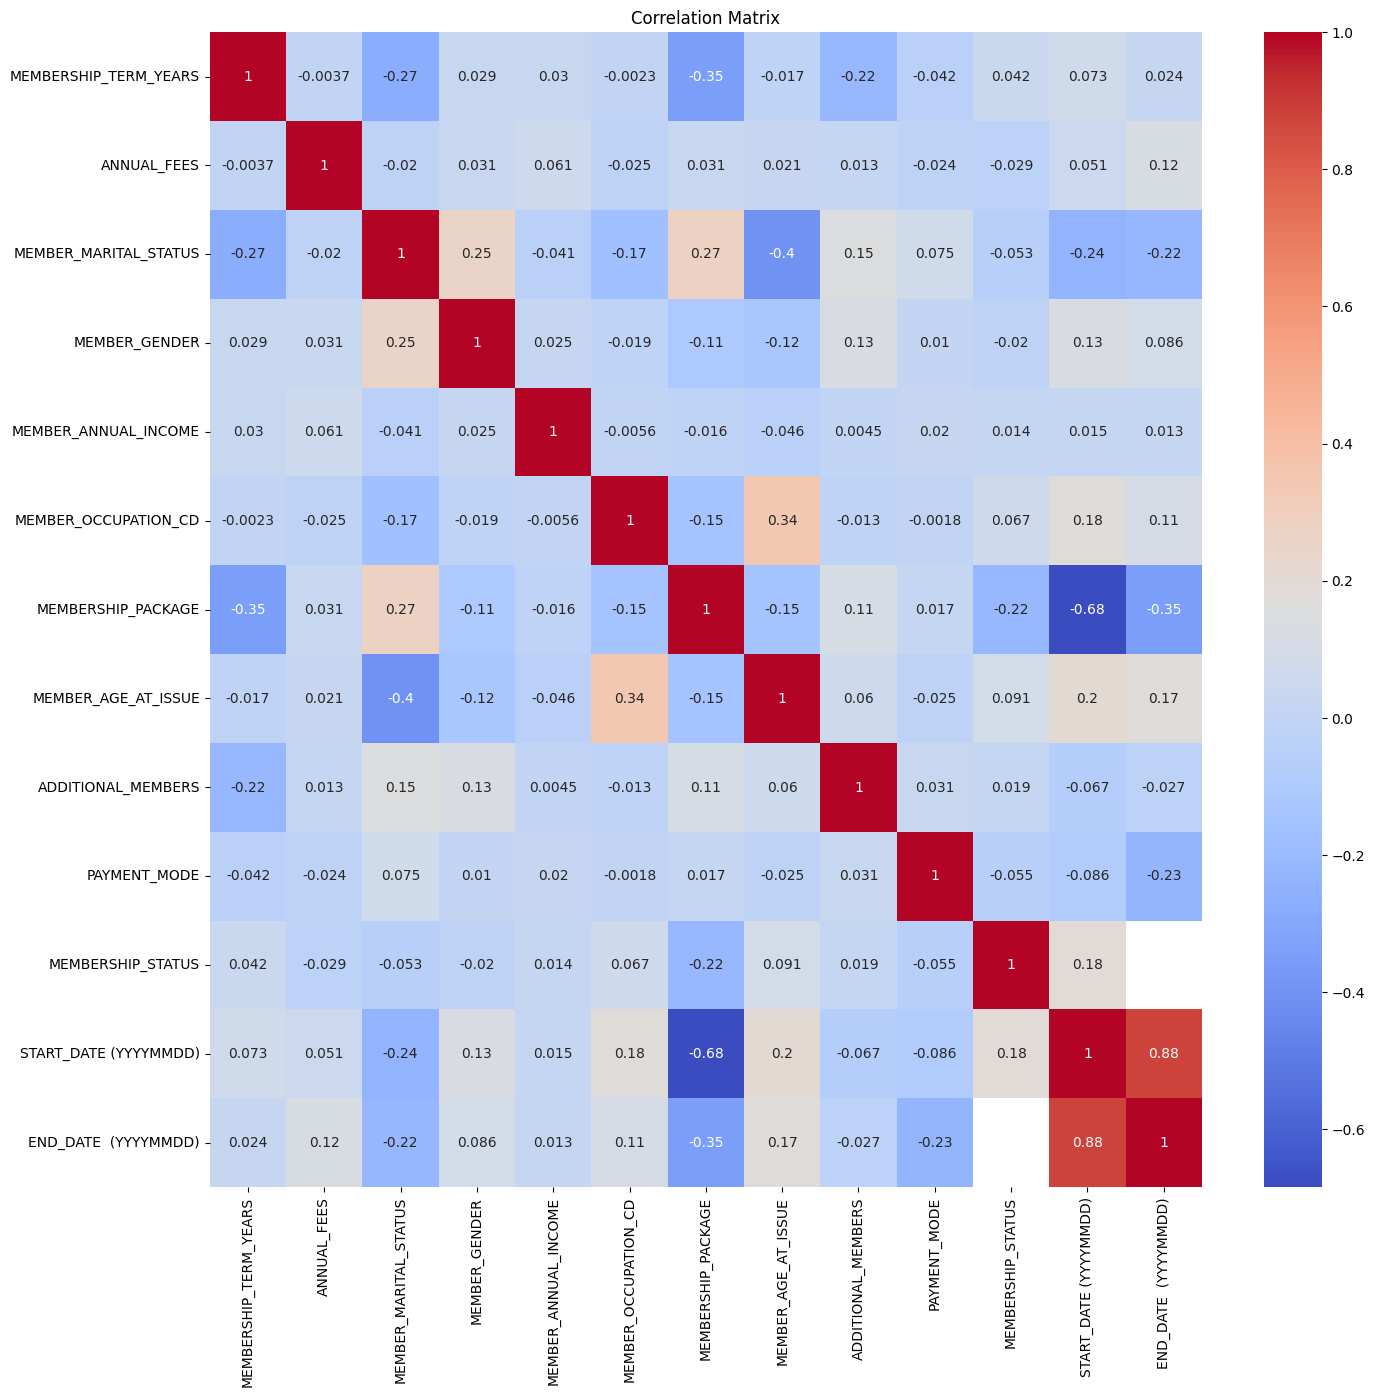

In [23]:
plt.figure(figsize=(16,15))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
features = ['MEMBERSHIP_NUMBER','MEMBERSHIP_TERM_YEARS','ANNUAL_FEES','MEMBERSHIP_PACKAGE','MEMBER_AGE_AT_ISSUE','ADDITIONAL_MEMBERS','AGENT_CODE']  # Replace with actual feature names
target = 'MEMBERSHIP_STATUS'

X = data2[features]
y = data2[target]

# Step b) Split the data into training and test. Fit a model and score it with the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'data' containing your dataset
# Split the data into features (X) and target variable (y)
X = data2.drop(columns=['MEMBERSHIP_STATUS'])  # Replace 'target_column_name' with the actual column name of your target variable
y = data2['MEMBERSHIP_STATUS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features in training and testing sets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)


True Negatives (TN): 3143
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP): 7219


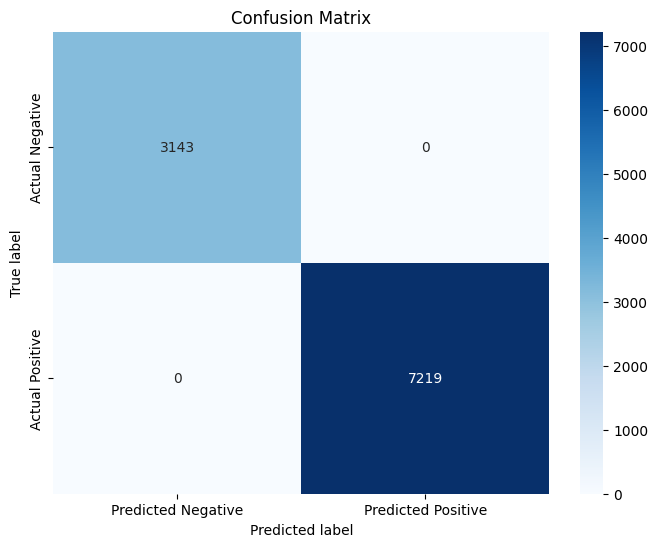

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
data=pd.read_excel('Assignment- Membership woes.xlsx')

# Specify the actual and predicted column names
actual_column_name = 'MEMBERSHIP_STATUS'  # Replace with the actual column name
predicted_column_name = 'MEMBERSHIP_STATUS'  # Replace with the predicted column name

# Extract actual and predicted labels from the DataFrame
actual_labels = data[actual_column_name].tolist()
predicted_labels = data[predicted_column_name].tolist()

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Extract TP, TN, FP, FN from the confusion matrix
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # To handle division by zero
recall = TP / (TP + FN) if (TP + FN) > 0 else 0  # To handle division by zero
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0  # To handle division by zero

# Print the computed scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")